In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sn

In [6]:
dataset = pd.read_csv("511_DATAPOINTS.csv")
dataset= dataset.iloc[650:]

In [7]:
dataset.head()

,index,time,iTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,cache-misses:u,cpu-cycles:u,LLC-store-misses,LLC-load-misses,dTLB-load-misses,branch-misses:u,instructions:u,branch-load-misses,L1-dcache-load-misses,cpi
650,650,130.428189,1582,2129,519109,1749,508965045,0,1166,29699,1591278,1167484563,1585138,23035118,0.435950
651,651,130.628370,2959,2749,736483,2335,508928133,0,475,51500,1808328,1151583259,1493509,24721812,0.441938
652,652,130.828560,2683,3909,565950,1847,509496648,9,744,52315,1397484,1187247057,1668774,25597489,0.429141
653,653,131.028737,1713,5899,646403,2358,507107385,0,1101,56910,1990793,1111215944,2018323,24890306,0.456354
654,654,131.228921,1765,1479,609630,2589,507957656,0,2526,24265,1521983,1171503669,1345563,22532481,0.433595


In [8]:
dataset.describe()

,index,time,iTLB-load-misses,dTLB-store-misses,L1-icache-load-misses,cache-misses:u,cpu-cycles:u,LLC-store-misses,LLC-load-misses,dTLB-load-misses,branch-misses:u,instructions:u,branch-load-misses,L1-dcache-load-misses,cpi
count,2524.000000,2524.000000,2524.000000,2524.000000,2.524000e+03,2524.000000,2.524000e+03,2524.000000,2524.000000,2524.000000,2.524000e+03,2.524000e+03,2.524000e+03,2.524000e+03,2524.000000
mean,1911.500000,382.965890,1831.757528,2402.230983,6.475031e+05,2570.895404,5.096205e+08,40.108558,1492.887876,34836.411252,1.347019e+06,1.166574e+09,1.343500e+06,2.609697e+07,0.437385
std,728.760363,145.889608,830.001941,1344.929647,1.474492e+05,2629.690466,5.926741e+06,80.231784,1758.906603,14977.700127,2.893814e+05,3.856913e+07,2.952155e+05,1.086225e+06,0.017412
min,650.000000,130.428189,747.000000,21.000000,3.648270e+05,132.000000,3.137747e+08,0.000000,25.000000,3872.000000,4.561760e+05,5.895057e+08,4.589430e+05,1.650723e+07,0.416555
25%,1280.750000,256.697114,1324.750000,1300.250000,5.959635e+05,1203.000000,5.095562e+08,2.000000,624.250000,21824.750000,1.095388e+06,1.153273e+09,1.086317e+06,2.547009e+07,0.429649
50%,1911.500000,382.967400,1641.000000,2286.000000,6.378385e+05,1794.500000,5.105492e+08,11.000000,1028.500000,35021.000000,1.375248e+06,1.168439e+09,1.364836e+06,2.608770e+07,0.436630
75%,2542.250000,509.234988,2108.000000,3281.000000,6.824335e+05,3055.750000,5.112371e+08,50.000000,1705.500000,46088.500000,1.573232e+06,1.187484e+09,1.565327e+06,2.671060e+07,0.442341
max,3173.000000,635.429554,14502.000000,10151.000000,3.969466e+06,44098.000000,5.187905e+08,1608.000000,30860.000000,79989.000000,2.225561e+06,1.226959e+09,2.201087e+06,2.973460e+07,0.784720


In [9]:
instructions = dataset['instructions:u'].values.reshape(-1,1) #extracting values of column instructions

y=dataset['cpi']  #setting y as CPI
# Create correlation matrix
corr_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] <= 0.00)]

# Drop features ds = dataset.drop(to_drop, axis=1, inplace=True)
X = dataset.drop(['cpi','cpu-cycles:u','instructions:u','index' ,'time','cache-misses:u'], axis = 1) #dropping all the other column which is not required

X = np.divide(X, instructions)  #dividing each columns value with instruction count (so all values are between 0 and 1)
#'LLC-store-misses','L1-icache-load-misses','l2_rqsts.all_demand_miss','dTLB-store-misses','l2_rqsts.code_rd_miss'

In [10]:
print(to_drop)
#X.head()
#print(sn.heatmap(dataset.corr()))
#print(sn.heatmap(X.corr()))

[]


AxesSubplot(0.125,0.125;0.62x0.755)


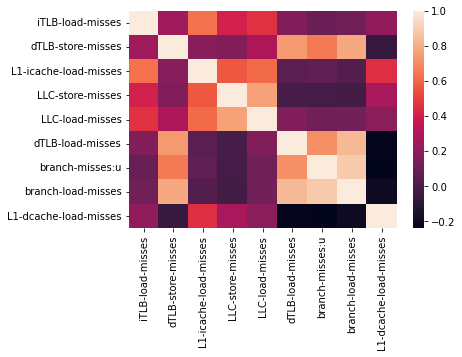

In [11]:
print(sn.heatmap(X.corr()))

In [12]:
from sklearn.model_selection import train_test_split  # performing train test split so that we can train our model on training data and test the model on testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0) #specifying how much should be train test split
print(X_train.shape)
print(X_test.shape)

(2271, 9)
(253, 9)


In [13]:
from sklearn.linear_model import Lasso  # used Lasso model for prediction becuase our aim is to get non-negative co-efficient
regressor = Lasso(alpha=0.00000000001,positive=True,max_iter=100) #setting parameter for Lasso difining alpha and setting how much max iter should be

temp=regressor.fit(X_train,y_train)  

coeff_df = pd.DataFrame(temp.coef_, X_train.columns, columns=['Cofficient']) # getting coefficient value with the name of column for which co-efficient is generated
print(coeff_df)
print()

print('Linear Intercept term: ',temp.intercept_) # obtaining intercept term

y_pred = regressor.predict(X_test)  # predicting the value of y(i.e. CPI) for testing data so that we can check how accurate our model is

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
print()
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Computing value of Root Mean Square Error for testing data
print("RMSE:- ",rmse)

rsq = r2_score(y_test,y_pred) # Computing R-Squared for testing data
print('R-square: ',rsq)

rad=1-(((1-rsq)*(len(y)-1))/(len(y)-1-X.shape[1])) # Computing Adjusted R-Squared for testing data
print('Adjusted R-square: ', rad)

F=(rsq/(1-rsq))*((len(y)-1-X.shape[1])/X.shape[1]) # Computing F-value for testing data
print('F value :',F)

print("Pvalues :",ttest_ind(X, y).pvalue) # Finding p-value

res=y_test-y_pred  # Getting vale of all the residuals
print('Sum of Residuals :', sum(res))


                         Cofficient
iTLB-load-misses         283.497935
dTLB-store-misses        284.936636
L1-icache-load-misses     50.585584
LLC-store-misses       13379.692363
LLC-load-misses         1018.124719
dTLB-load-misses          39.998651
branch-misses:u           10.982061
branch-load-misses        11.760485
L1-dcache-load-misses      1.597381

Linear Intercept term:  0.34287319479029127

RMSE:-  0.003982617209624809
R-square:  0.9706770534430886
Adjusted R-square:  0.9705720786940782
F value : 9246.767080593007
Pvalues : [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sum of Residuals : -0.011503206214152295


In [14]:
mean_instruction = dataset['instructions:u'].values.mean()  # Computing mean of total instruction
mean_cpi = dataset['cpi'].values.mean() # Computing mean of CPI 

#Extracting values of all the co-efficient for calculation and storing them in specific variable
C1=temp.coef_[0]
C2=temp.coef_[1]
C3=temp.coef_[2]
C4=temp.coef_[3]
C5=temp.coef_[4]
C6=temp.coef_[5]
C7=temp.coef_[6]
C8=temp.coef_[7]
C9=temp.coef_[8]

# getting name in coefficient array so that we can check which value is for which array
index = coeff_df.index
a_list = list(index)

# Computing CPI for all the miss event for developing the CPI stack
mean_C1 = dataset[a_list[0]].values.mean()  # in order to get the CPI  obtained mean of count of specific column
cpi_of_c1=C1*(mean_C1/mean_instruction) # For getting value between 0 and 1 we have divided each column with count of inst so here again we are dividing with count of instructions
print(a_list[0],cpi_of_c1)  # printing the name of miss event and value of CPI corresponding to the miss event

# same above three steps are continued for all the events
mean_C2 = dataset[a_list[1]].values.mean()
cpi_of_c2=C2*(mean_C2/mean_instruction)
print(a_list[1],cpi_of_c2)

mean_C3 = dataset[a_list[2]].values.mean()
cpi_of_c3=C3*(mean_C3/mean_instruction)
print(a_list[2],cpi_of_c3)

mean_C4 = dataset[a_list[3]].values.mean()
cpi_of_c4=C4*(mean_C4/mean_instruction)
print(a_list[3],cpi_of_c4)

mean_C5 = dataset[a_list[4]].values.mean()
cpi_of_c5=C5*(mean_C5/mean_instruction)
print(a_list[4],cpi_of_c5)

mean_C6 = dataset[a_list[5]].values.mean()
cpi_of_c6=C6*(mean_C6/mean_instruction)
print(a_list[5],cpi_of_c6)

mean_C7 = dataset[a_list[6]].values.mean()
cpi_of_c7=C7*(mean_C7/mean_instruction)
print(a_list[6],cpi_of_c7)

mean_C8 = dataset[a_list[7]].values.mean()
cpi_of_c8=C8*(mean_C8/mean_instruction)
print(a_list[7],cpi_of_c8)

mean_C9 = dataset[a_list[8]].values.mean()
cpi_of_c9=C9*(mean_C9/mean_instruction)
print(a_list[8],cpi_of_c9)



Base_cpi=temp.intercept_  # intercept will give the value of base CPI and for building the stack we will need base CPI
print('Base CPI is--            ',Base_cpi)

misses_cpi=cpi_of_c1+cpi_of_c2+cpi_of_c3+cpi_of_c4+cpi_of_c5+cpi_of_c6+cpi_of_c7+cpi_of_c8 +cpi_of_c9# Finding CPI contribution due to all the misses
print('Misses CPI is--            ',misses_cpi)

print('CPI we got is--            ',Base_cpi+misses_cpi) # what is the average CPI we got by our calculation

print('Average CPI is--            ',mean_cpi) # what is the actual average CPI for the benchmark

iTLB-load-misses 0.00044514938486849866
dTLB-store-misses 0.0005867470957628697
L1-icache-load-misses 0.02807737341447078
LLC-store-misses 0.00046001401863663815
LLC-load-misses 0.0013029149435546728
dTLB-load-misses 0.0011944463561291228
branch-misses:u 0.01268076501740013
branch-load-misses 0.013544118583425212
L1-dcache-load-misses 0.03573438876570991
Base CPI is--             0.34287319479029127
Misses CPI is--             0.09402591757995783
CPI we got is--             0.4368991123702491
Average CPI is--             0.43738549069378896


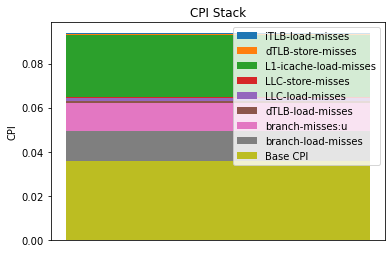

In [15]:
#creating the array of all the values of CPI of all the miss event so that we can directly get value byindexing also appended base CPI
array_of_cpi=[cpi_of_c1,cpi_of_c2,cpi_of_c3,cpi_of_c4,cpi_of_c5,cpi_of_c6,cpi_of_c7,cpi_of_c8,cpi_of_c9,Base_cpi]

label_of_cpi=[]  # this array will store the name of all the miss event we have 
for i in range(0,8):
    label_of_cpi.append(a_list[i])
label_of_cpi.append('Base CPI') # we also add base cpi in the array becuase this will be the base of stack

sum_prev_cpi=0 # for building the stck we will need CPI in the format of sum because if we are moving up in the bar graph than our value is increasing by that number

for i in range(8,-1,-1):  # getting the sum to build stack (Here base cpi is not used becuase we not need to do any sumation for base CPI becuse that will be base of stack)
    array_of_cpi[i]=array_of_cpi[i]+sum_prev_cpi
    sum_prev_cpi=array_of_cpi[i]
    
width = 0.35        # width of the bar

fig, ax = plt.subplots() # generating the CPI stack
for i in range(0,9):
    ax.bar( width,array_of_cpi[i],  label=label_of_cpi[i])
    
ax.set_ylabel('CPI')  # y axis is labled as CPI
ax.set_title('CPI Stack')
ax.legend()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

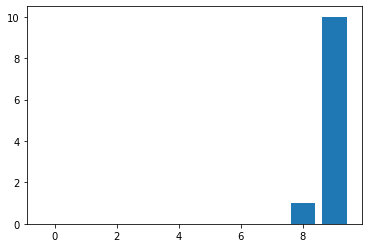

In [16]:
# For better visulation of the miss event we have built this bar graph so that we can compare all the miss event 
# including the base CPI (By comapring the length of bar we can analyze that which event is contributing how much
# to the CPI)

r=[cpi_of_c1,cpi_of_c2,cpi_of_c3,cpi_of_c4,cpi_of_c5,cpi_of_c6,cpi_of_c7,cpi_of_c8,cpi_of_c9,Base_cpi]
s = np.array([int((x - min(r))/(max(r) - min(r)) * 10) for x in r])

plt.bar(np.arange(len(s)), s)
plt.show()

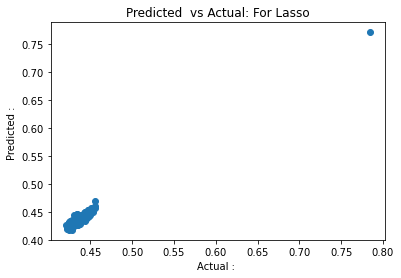

In [17]:
# we have plotted our prediction
# here y axis is predicted value and x axis is actual value 
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual : ")
plt.ylabel("Predicted : ")
plt.title("Predicted  vs Actual: For Lasso")
plt.show()

In [18]:
# Note:- Code below for here is just for checking not used in assignment report or anywhere else 
# All the code below from this point is for Linear regression we have just used this to check that what is the 
# difference we got between the Linear regression model and lasso model 


from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
# temp=regressor.fit(X_train, y_train)
temp=regressor_linear.fit(X_train, y_train)
y_pred_linear = regressor_linear.predict(X_test)


In [19]:
print('Linear Intercept term: ',temp.intercept_) # This gives us the intercept term
print('Linear Coefficients: \n',temp.coef_) 
# print(temp.coef_)



Linear Intercept term:  0.3433580876615788
Linear Coefficients: 
 [2.90966820e+02 2.86456293e+02 5.02697390e+01 1.64439173e+04
 9.19922995e+02 4.26820912e+01 1.10760257e+01 1.16729370e+01
 1.57980840e+00]


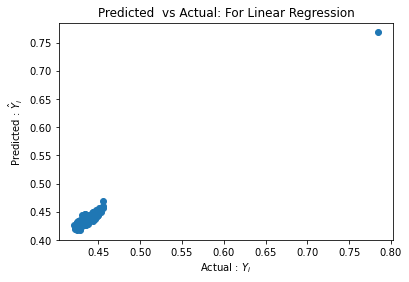

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_linear)
plt.xlabel("Actual : $Y_i$")
plt.ylabel("Predicted : $\hat{Y}_i$")
plt.title("Predicted  vs Actual: For Linear Regression")
plt.show()
# print(y_pred_linear)
# print(y_pred)